In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report,
                            confusion_matrix, roc_auc_score, roc_curve)
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
uploaded = files.upload()
file_name = next(iter(uploaded))  # Get the name of the uploaded file
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving Heart Failure.csv to Heart Failure.csv


In [5]:
# Display dataset info
print("\nDataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())


Dataset Preview:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0    False                    582.00     False                 20   
1  55.0    False                   1280.25     False                 38   
2  65.0    False                    146.00     False                 20   
3  50.0     True                    111.00     False                 20   
4  65.0     True                    160.00      True                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium    sex  \
0                 True  265000.00               1.9           130   True   
1                False  263358.03               1.1           136   True   
2                False  162000.00               1.3           129   True   
3                False  210000.00               1.9           137   True   
4                False  327000.00               2.7           116  False   

   smoking  time  DEATH_EVENT age_group  
0    False     4         True   

In [6]:
bool_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
df[bool_cols] = df[bool_cols].astype(int)


In [8]:
df['age_group'] = df['age_group'].fillna(df['age_group'].mode()[0])
df['age_group'] = pd.Categorical(df['age_group']).codes


In [9]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']


In [11]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Scale numerical features
scaler = StandardScaler()
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
            'platelets', 'serum_creatinine', 'serum_sodium', 'time']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [12]:
#Train models
print("\nTraining Logistic Regression Model...")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

print("\nTraining Random Forest Model...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



Training Logistic Regression Model...

Training Random Forest Model...


RandomForestClassifier(random_state=42)


Logistic Regression Performance:

Accuracy: 0.8166666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60



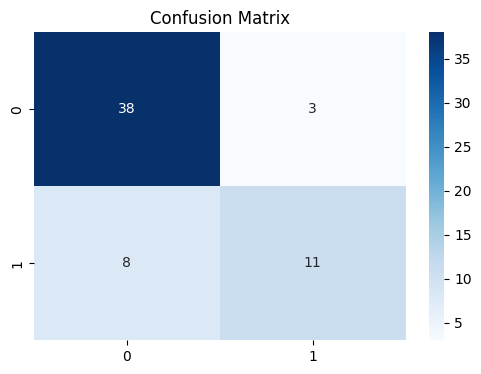

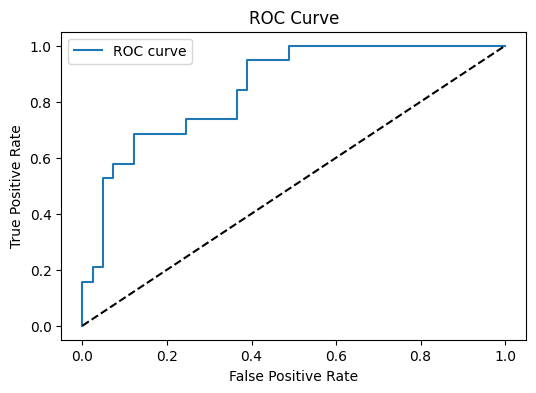

AUC Score: 0.8485237483953787

Random Forest Performance:

Accuracy: 0.8166666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.75      0.63      0.69        19

    accuracy                           0.82        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.81      0.82      0.81        60



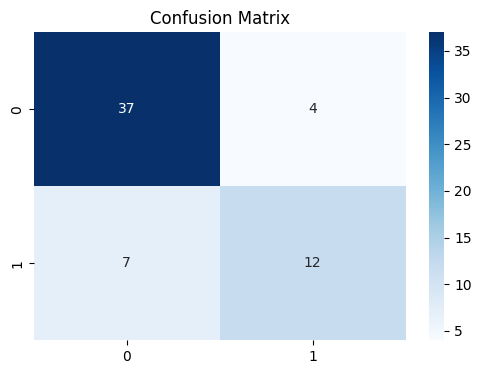

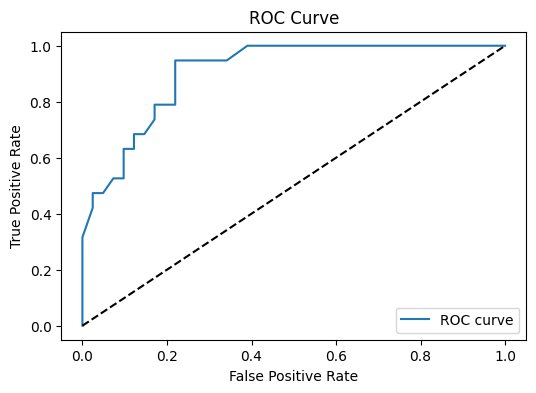

AUC Score: 0.9062901155327342


In [13]:
# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    print("AUC Score:", roc_auc_score(y_test, y_proba))

print("\nLogistic Regression Performance:")
evaluate_model(logreg, X_test, y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf, X_test, y_test)


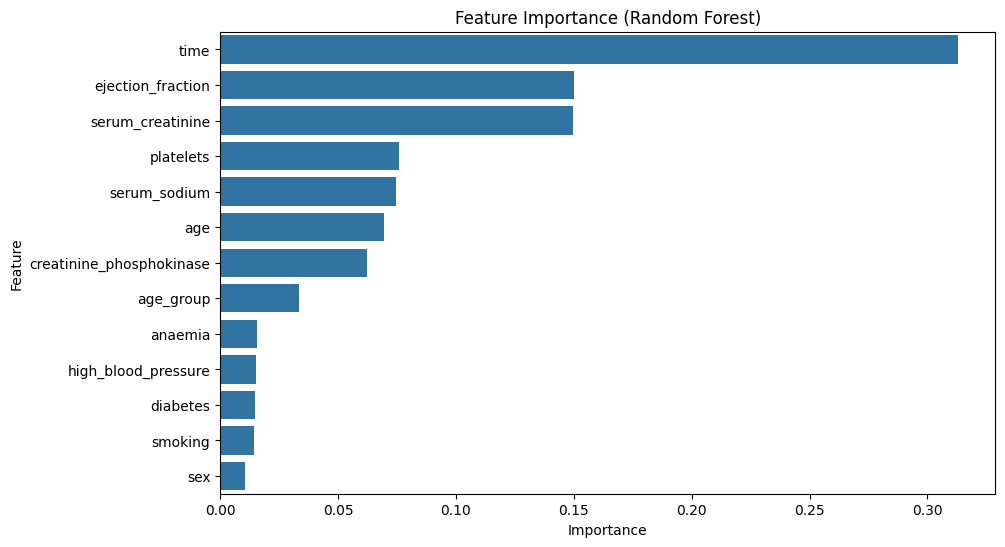

In [14]:
# Step 6: Feature Importance (for Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()



In [15]:
# Save the best model
import joblib
joblib.dump(rf, 'heart_failure_rf_model.pkl')
print("\nSaved Random Forest model as 'heart_failure_rf_model.pkl'")
#Download the model to local machine
files.download('heart_failure_rf_model.pkl')


Saved Random Forest model as 'heart_failure_rf_model.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>